## MISO Electricity Data Visualization

This notebook visualizes operating data collected from the Midwest Independent System Operator (MISO) to determine the relationship between the various features and wind offer prices.

In [60]:
#Import necessary libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [48]:
#import scrubbed data
base_path = r'C:\Users\jhensley\Desktop\GA_Data_Science\DS-DC-16\projects\final-projects\data\\'
miso = pd.DataFrame.from_csv(base_path + 'miso.csv')

In [74]:
#Preview data
miso.head()

,forecast_load,actual_load,forecast_error,wind_mwh,LMP,coal,gas,hydro,nuclear,wind,...,DR Type2 Emergency Max,Other Fossil Emergency Max,Other Peaker Emergency Max,Pumped Storage Emergency Max,Run of River Emergency Max,Steam Turbine Emergency Max,Wind Emergency Max,hh_price,Peak,wind_share
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,76068.0,75033.67,1034.33,3916.94,24.876667,47208.1,7950.4,493.8,11608.3,3866.6,...,75.0,1039.8,239.2,2834.0,1176.5,89530.4,4473.4,4.31,0,0.052202
2014-01-01 01:00:00,74156.0,72893.76,1262.24,3884.92,25.680000,45614.0,7553.1,493.2,11607.9,3829.9,...,75.0,1039.8,239.2,2834.0,1176.9,88833.4,4411.1,4.31,0,0.053296
2014-01-01 02:00:00,72572.0,71484.47,1087.53,3866.15,24.583333,44471.2,7440.9,493.4,11608.9,3848.4,...,75.0,1039.8,239.2,2834.0,1176.9,88944.4,4324.9,4.31,0,0.054084
2014-01-01 03:00:00,71857.0,70472.20,1384.80,3803.32,23.551667,43614.5,7356.7,492.6,11615.3,3775.4,...,75.0,1039.8,239.2,2834.0,1176.9,88590.4,4227.1,4.31,0,0.053969
2014-01-01 04:00:00,72477.0,70214.03,2262.97,3659.99,23.930000,43167.2,7404.9,492.8,11617.2,3657.8,...,75.0,1038.8,239.2,2834.0,1176.9,89300.5,4107.1,4.31,0,0.052126


In [49]:
#Start to explore data
miso.describe()

,forecast_load,actual_load,forecast_error,wind_mwh,LMP,coal,gas,hydro,nuclear,wind,...,DR Type2 Emergency Max,Other Fossil Emergency Max,Other Peaker Emergency Max,Pumped Storage Emergency Max,Run of River Emergency Max,Steam Turbine Emergency Max,Wind Emergency Max,hh_price,Peak,wind_share
count,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,...,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000,28766.000000
mean,78287.632483,77763.906809,523.725674,4475.977261,30.496073,38350.292651,14812.589251,1025.663877,11733.806184,4464.120521,...,30.195126,907.355228,250.428002,2618.118696,1417.869673,84790.371731,5640.816193,3.175756,0.625391,0.060191
std,12397.705881,12517.306824,2350.710440,2700.806027,22.666876,8385.014434,5864.205435,503.113168,1126.748706,2695.695580,...,36.417098,109.900747,32.036851,387.932230,138.262243,3392.714241,2327.080564,0.982924,0.484030,0.038848
min,52299.000000,50994.860000,-6121.020000,-9.620000,-25.743333,16587.000000,4569.500000,305.000000,8094.600000,26.600000,...,-1.000000,572.300000,201.200000,1176.500000,975.900000,75596.200000,1642.800000,1.490000,0.000000,-0.000110
25%,69551.000000,68807.947500,-342.940000,2243.767500,21.990000,32194.350000,10476.600000,685.200000,11114.925000,2233.300000,...,0.000000,845.200000,224.600000,2348.075000,1332.000000,82139.125000,3709.850000,2.630000,0.000000,0.028257
50%,76539.500000,76122.690000,498.495000,4046.525000,26.220000,38488.400000,13800.450000,878.600000,11902.600000,4043.850000,...,0.000000,890.300000,238.200000,2694.200000,1414.650000,84909.750000,5230.700000,2.880000,1.000000,0.052718
75%,85608.750000,85247.497500,1324.300000,6437.560000,32.758333,44956.300000,18203.275000,1188.000000,12753.300000,6423.800000,...,75.000000,1002.300000,278.100000,2933.075000,1502.475000,87733.475000,7251.300000,3.890000,1.000000,0.087300
max,152218.000000,120366.930000,75027.370000,13000.280000,1785.795000,56776.700000,43125.700000,3293.500000,13255.600000,12994.000000,...,75.000000,1245.200000,330.000000,3501.900000,1877.700000,93712.800000,13223.500000,8.150000,1.000000,0.213981


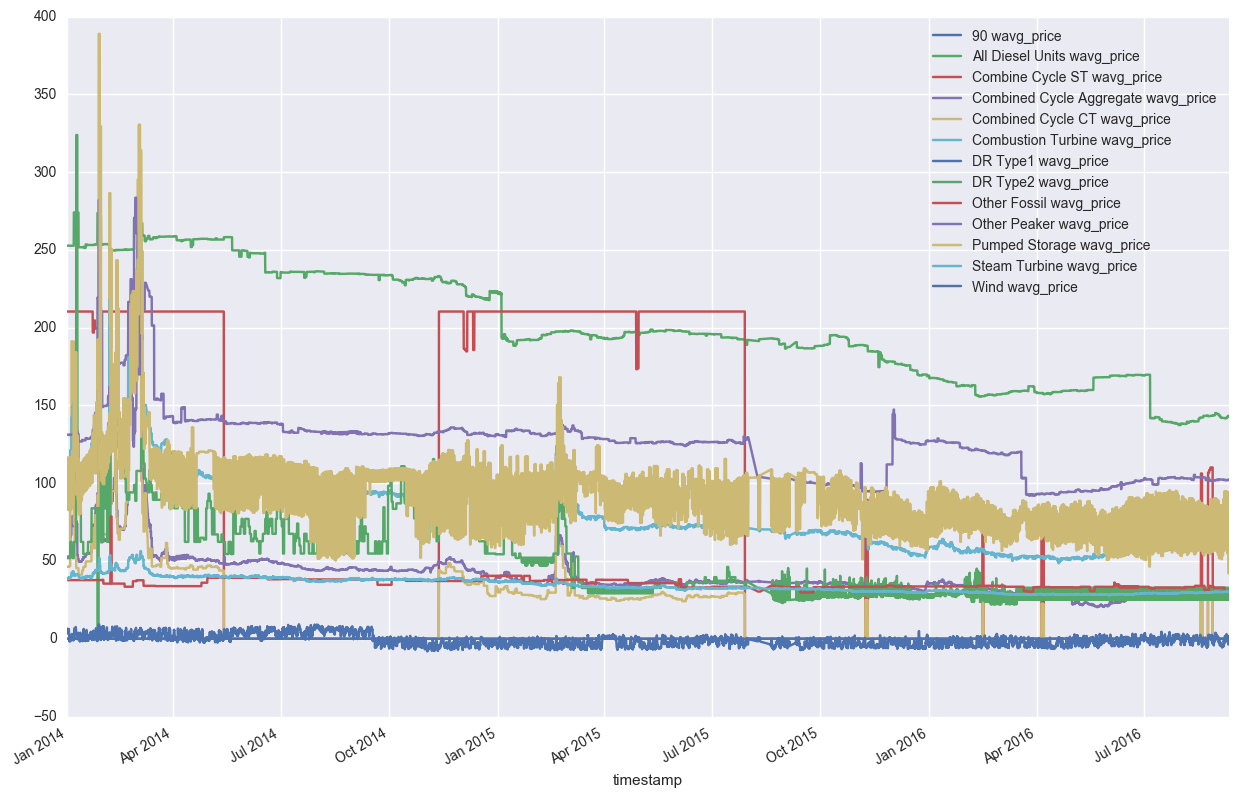

In [72]:
#Plot average offer prices by technology
prices = miso.columns[miso.columns.str.contains('wavg')==True]
prices =prices.drop(['Run of River wavg_price'])

miso[prices].plot(figsize=(15,10))

In [63]:
#Create a function to build a linear plot exploring the relationship between electricity productiona and LMPs for each
#major generating technology and their averaged offered price
def price_tech_plot(feature):
    miso1 = miso[miso.LMP<150]
    
    #plot LM_model
    sns.lmplot(x=feature, y='Wind wavg_price', data=miso1,size=5)

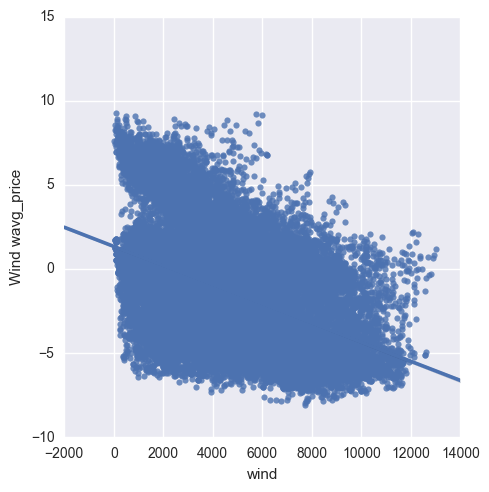

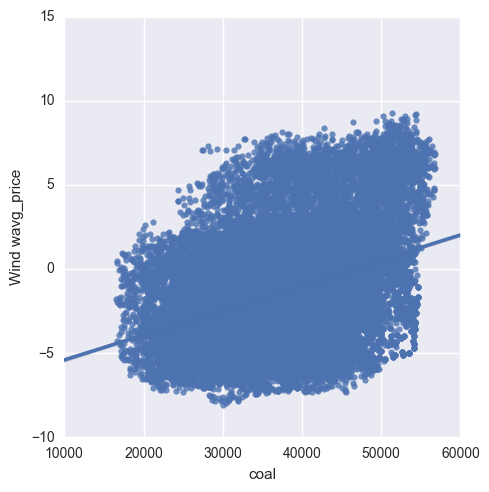

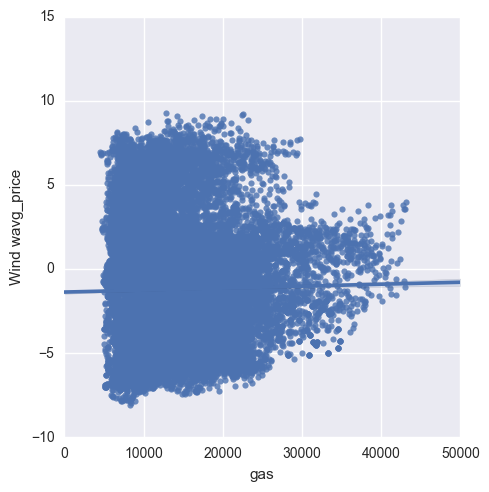

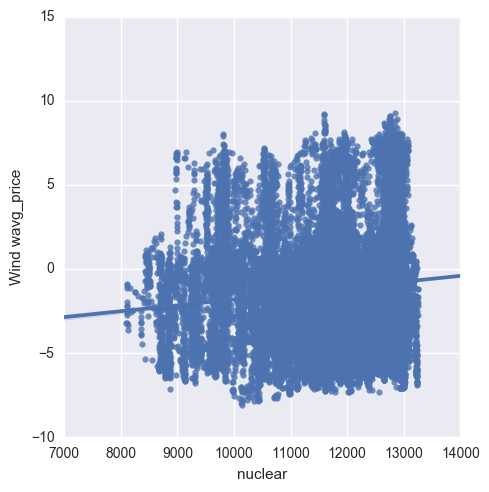

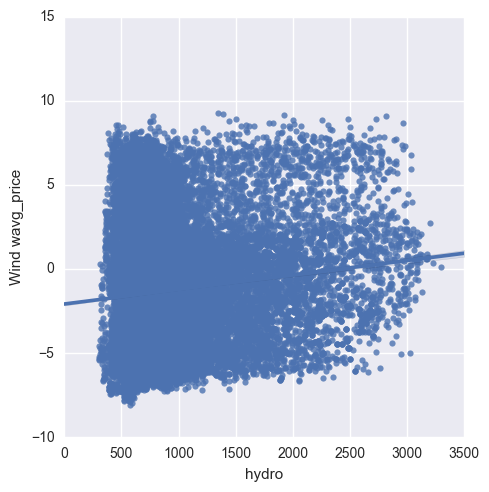

In [64]:
#Plot relationship between production and LMP
techs = ['wind','coal','gas','nuclear','hydro']
for tech in techs:
    price_tech_plot(tech)

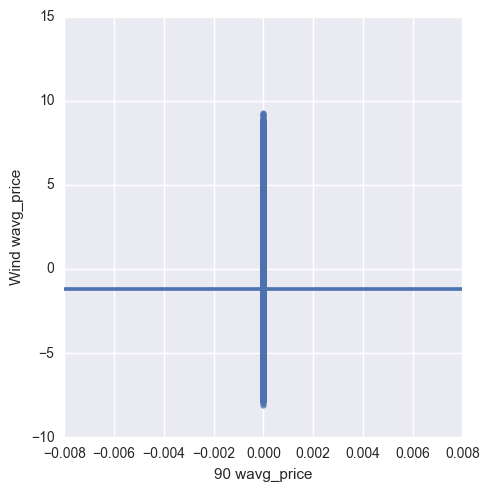

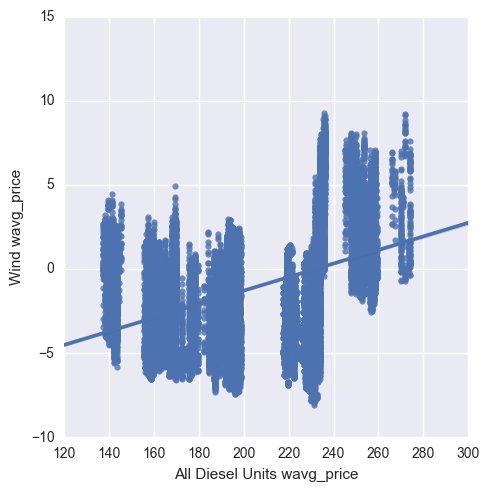

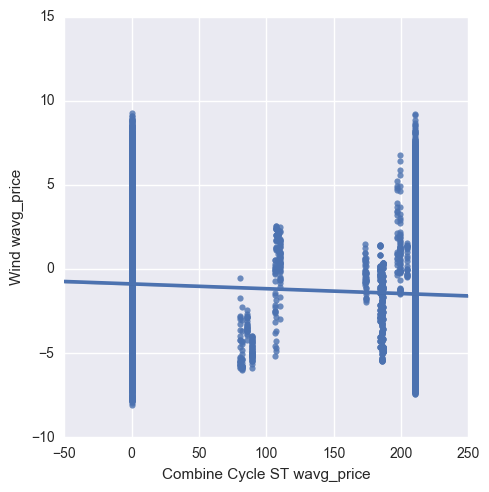

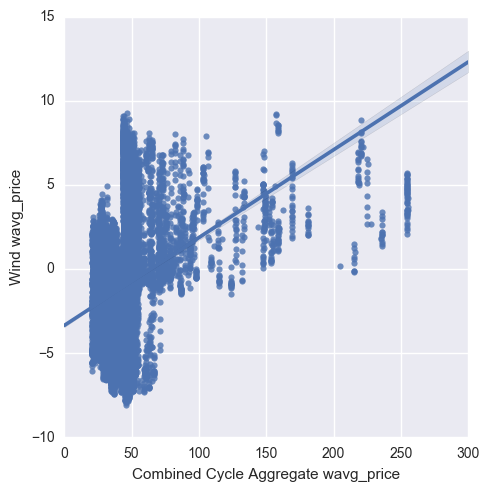

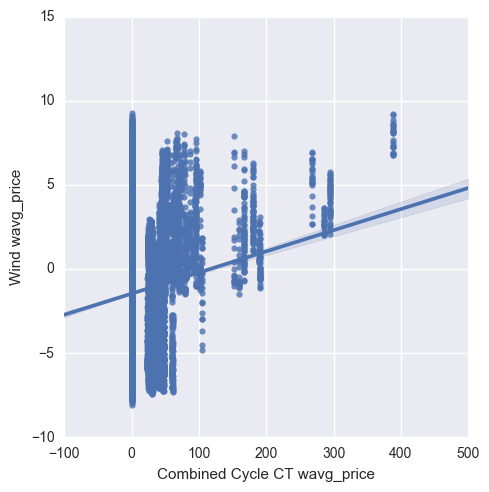

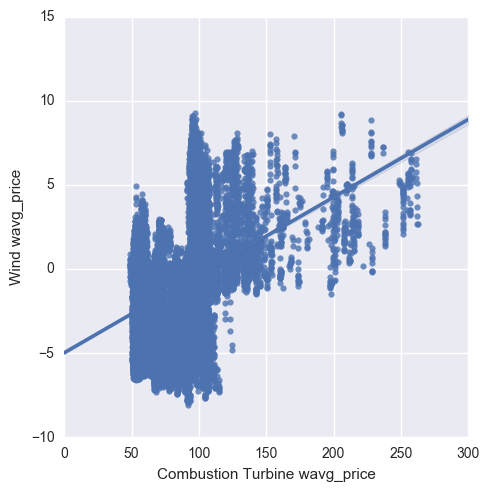

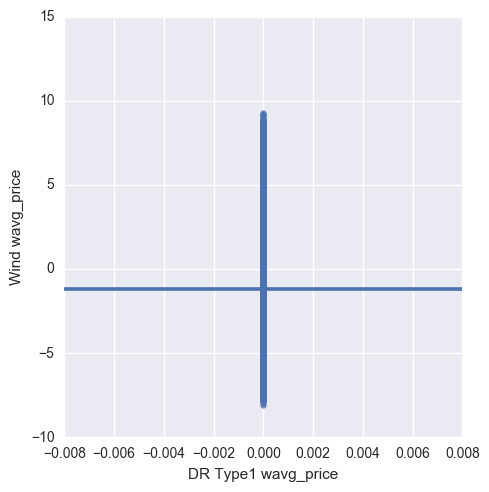

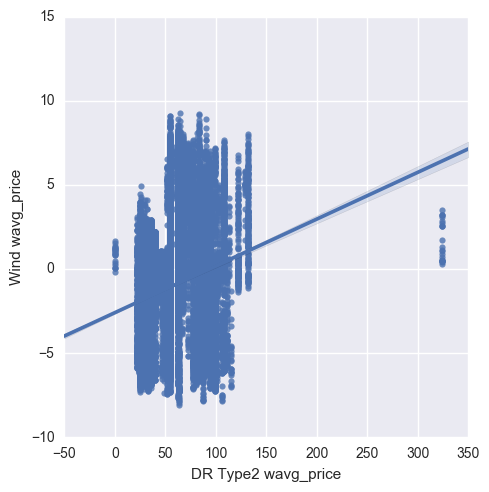

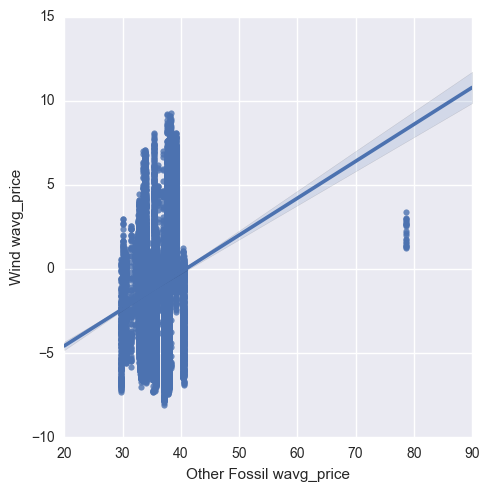

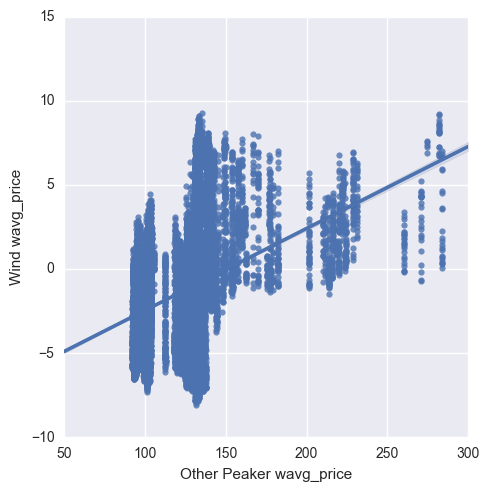

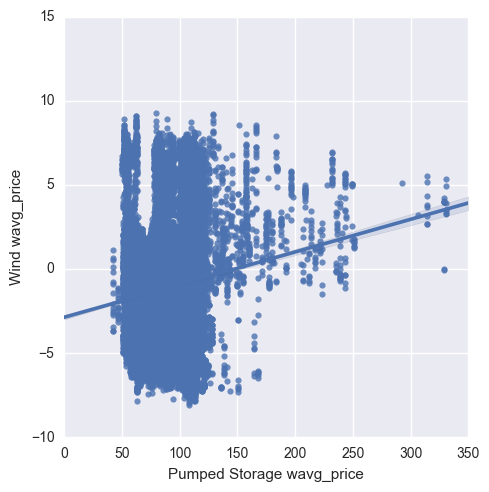

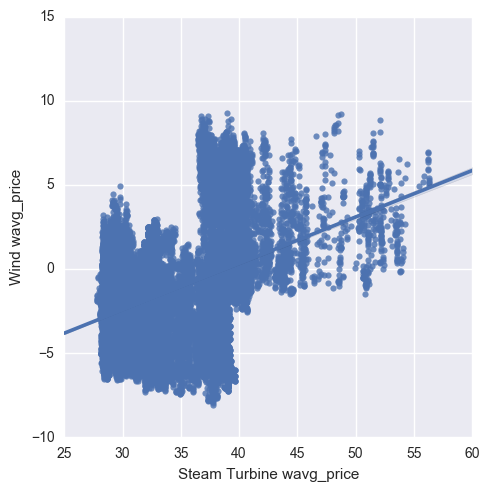

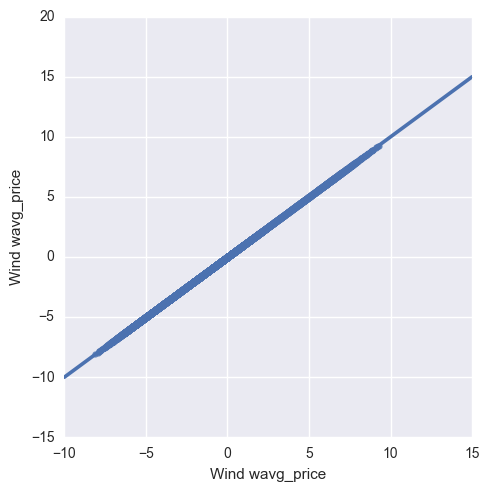

In [73]:
#Plot relationship between average offer prices and LMPs
for price in prices:
    price_tech_plot(price)

In [106]:
#Plot average wind offer price
wind = miso['Wind wavg_price']
wind = wind.reset_index(drop=True)
wind = wind.sort_values(ascending=False)
wind = wind.reset_index(drop=True)

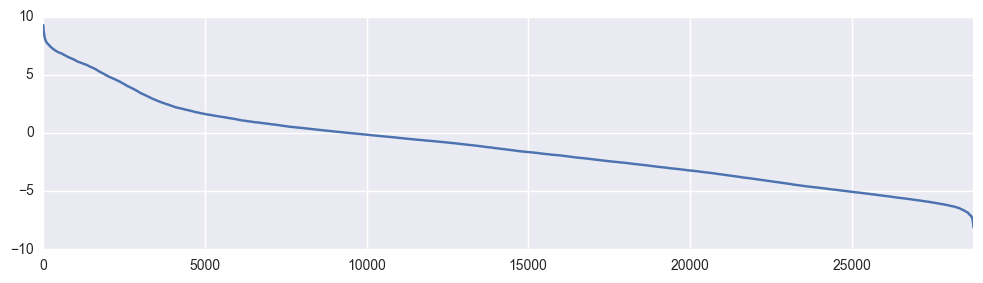

In [110]:
#plot
wind.plot(figsize=(12,3))

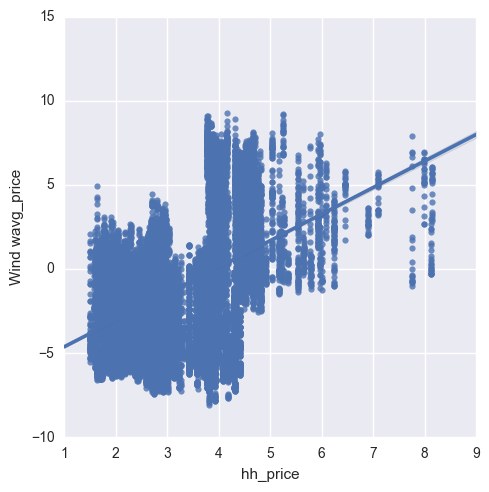

In [113]:
price_tech_plot('hh_price')